In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
df.shape

(545, 13)

In [55]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


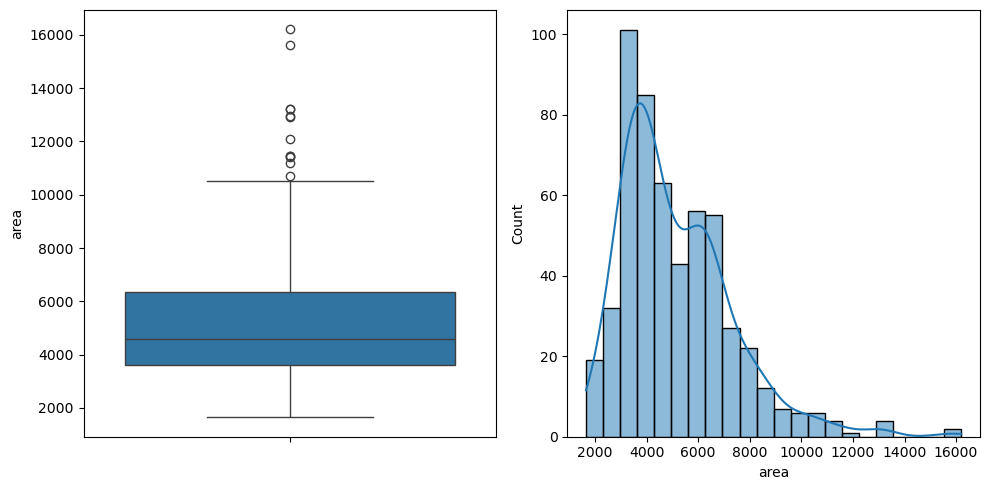

In [58]:
# box-plot 
fig, axes = plt.subplots(1,2,figsize = (10,5))

sns.boxplot(df['area'],ax = axes[0])
sns.histplot(df['area'], ax = axes[1], kde = True)
plt.tight_layout()
plt.show()

In [59]:
# skewed distribution hence IQR outlier removal

# area outlier removal
q1,q3 = df['area'].quantile([0.25,0.75])
IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

df['area'] = np.where(df['area'] > upper_limit, upper_limit,
                     np.where(df['area']<lower_limit, lower_limit, df['area'])
                     )

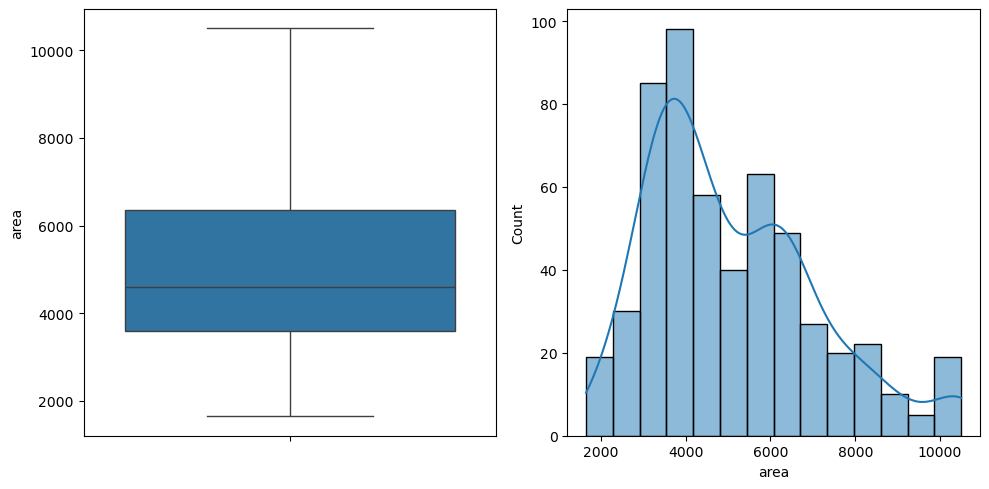

In [60]:
# box-plot 
fig, axes = plt.subplots(1,2,figsize = (10,5))

sns.boxplot(df['area'],ax = axes[0])
sns.histplot(df['area'], ax = axes[1], kde = True)
plt.tight_layout()
plt.show()

In [61]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [62]:
print(df['hotwaterheating'].value_counts())
print(df['airconditioning'].value_counts())
print(df['mainroad'].value_counts())
print(df['guestroom'].value_counts())
print(df['basement'].value_counts())
print(df['prefarea'].value_counts())
print(df['furnishingstatus'].value_counts())

hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [70]:
# encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(remainder = 'passthrough',
                     transformers = [
                         ('encode', OneHotEncoder(drop = 'first',sparse_output = True, handle_unknown = 'ignore'),[4,5,6,7,8,10,11])
                     ])


In [71]:
# Train Test split
x = df.drop(columns = ['price'])
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)
x_train.shape,x_test.shape

((436, 12), (109, 12))

In [76]:
x_train_transform = ct.fit_transform(x_train)
x_test_transform = ct.transform(x_test)
x_train_transform.shape

(436, 13)

In [77]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_std = std.fit_transform(x_train_transform)
x_test_std = std.transform(x_test_transform)

In [87]:
# Model fitting and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(x_train_std,y_train)

y_train_pred  = lr.predict(x_train_std)
y_test_pred = lr.predict(x_test_std)

print('Train R2 = ',r2_score(y_train,y_train_pred))
print('Test R2 = ',r2_score(y_test,y_test_pred))

print('Train MSE = ',mean_squared_error(y_train,y_train_pred))
print('Test MSE = ',mean_squared_error(y_test,y_test_pred))

print('Train MAE = ',mean_absolute_error(y_train,y_train_pred))
print('Test MAE = ',mean_absolute_error(y_test,y_test_pred))

Train R2 =  0.6850920195378302
Test R2 =  0.6499526163304721
Train MSE =  970984866637.147
Test MSE =  1769339090312.066
Train MAE =  718106.61387015
Test MAE =  980098.6025385099


In [93]:
lr.coef_

array([ 125540.63169545,   76498.77952721,  185292.70013377,
        153136.3260502 ,  357846.90305214,  259140.0458207 ,
        -67045.40355584, -192120.54136536,  526421.01039673,
         65719.06531111,  524314.64058196,  339548.32700234,
        181240.12342881])

In [94]:
lr.intercept_

np.float64(4706527.385321101)

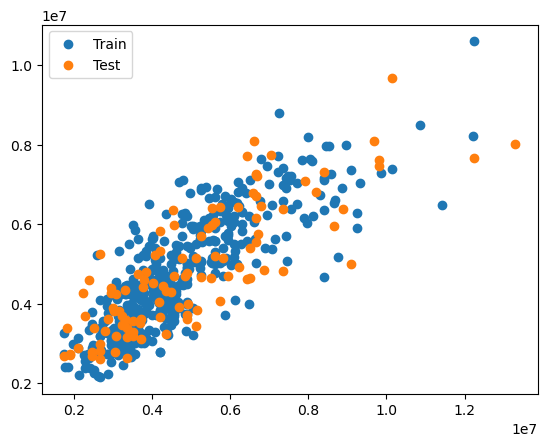

In [107]:
plt.scatter(y_train,y_train_pred, label = 'Train')
plt.scatter(y_test,y_test_pred, label = 'Test')
plt.legend()
plt.show()